In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.linalg as lin
import funciones_spin as sp
%matplotlib notebook

In [2]:
lista1 = np.array( [[1, 0]] )  
lista2 = np.array( [[0, 0]] )
H_ext = np.array([0, 0, 2])
s1 = sp.esf_to_cart(1, 0, 0)
s2 = sp.esf_to_cart(1,np.pi/2, 0)
nodo1 = sp.Nodo_spin(s1, H_ext, lista1)
nodo2 = sp.Nodo_spin(s2, H_ext, lista2)
lista_nodo0 = [nodo1, nodo2]
t_array = np.linspace(0, 50, 1000)
lista_nodo0[0].spin
lista_nodos = sp.simular_spines(t_array, lista_nodo0)
spines = sp.extraer_spines(lista_nodos)

<IPython.core.display.Javascript object>


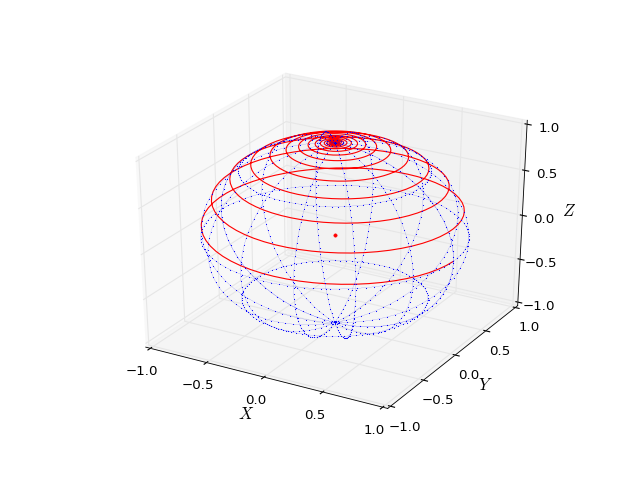

<IPython.core.display.Javascript object>


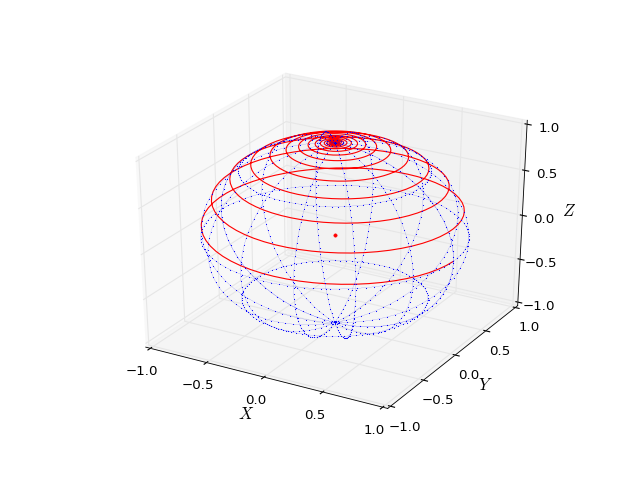

0

In [4]:
dt = 0.001
s1 = spines[0,:,:]
s2 = spines[1,:,:]
#for i in range(np.size(s1, 0)):
#    print norma(s1[i,:])
#avanzar_nodo(dt, lista_nodo0, 0).spin
plt.clf()
sp.plot_spin(s2, t_array, 1)
sp.plot_spin(s2, t_array, 2)